In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [16]:
path = 'C:/Users/Bhoomeendra/SMAI/faces'
imgsize = 64*64
nameImg = {} # A :[ imga1 ,img]
for img in os.listdir(path):
    finalPath = os.path.join(path,img)
    cimg = cv2.imread(finalPath,-1)
    name = img[:-9]
    
    if(nameImg.get(name) == None):
        nameImg[name] = [np.asarray(cimg,dtype='float')/255]
    else:
        nameImg[name].append(np.asarray(cimg,dtype='float')/255)
print(len(nameImg))

5749


In [57]:
count = np.zeros((1000))
for key, value in nameImg.items():
    count[len(value)]=1+ count[len(value)]

In [58]:
# No of people with more than 20 or more photos 
print(np.sum(count[20:]))

62.0


In [17]:

testImgNo = 19
# Nomalized but not mean centred
trainImg = {}
testImg  = {}# threshold for test
for key, value in nameImg.items():
    if(len(value)>testImgNo):
        trainImg[key] = value[:testImgNo]
        testImg[key]  = [value[testImgNo]]

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

In [86]:
label = list()
y = list()
for key, value in nameImg.items():
    if(len(value)>testImgNo):
        label.append(key)
        y.append(len(value[testImgNo:]))
print(len(y))
plt.plot(label,y)
plt.show()

62


In [18]:
#Calculating Matrix A
NSA = np.zeros((len(trainImg)*testImgNo,imgsize))
print("Matrix Size: ",NSA.shape)
j=0

for key, value in trainImg.items():
    for face in value:
        flt = face.flatten()
        for k in range(len(flt)):
            NSA[j][k]=flt[k]
        j=j+1
j=0

testMatrix = np.zeros((len(testImg),imgsize))
for key,value in testImg.items():
    for face in value:
        flt = face.flatten()
        for k in range(len(flt)):
            testMatrix[j][k]=flt[k]
        j=j+1
print("Test Size: ",testMatrix.shape)

Matrix Size:  (1178, 4096)
Test Size:  (62, 4096)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(NSA)
A=scaler.transform(NSA)
test = scaler.transform(testMatrix)

In [122]:
print((1178)**(1/2))

34.322004603461025


In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=700)
pca.fit(A)
A_pca=pca.transform(A)
test_pca=pca.transform(test)
A_pcaScaled = (10**14)*A_pca
test_pcaScaled = (10**14)*test_pca

In [74]:
# Class wise Avg vector
avgFace = list()
for j in range(0,62):
    avg = np.zeros((700))
    for i in range(0,19):
        avg = avg+A_pca[19*j+i,:]
    avgFace.append(avg/19)


In [75]:
print(avgFace[0].shape)

(700,)


In [37]:
'''
import scipy 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
label = np.zeros(A_pca.shape[0])
for i in range(A_pca.shape[0]):
    label[i] = i//19
neigh.fit(A_pca,label)
'''
reconstructedtest = list()
reconstructedtrain = list()
for t in test_pca:
    img = pca.inverse_transform(t)
    reconstructedtest.append(img)
for k in A_pca:
    img = pca.inverse_transform(k)
    reconstructedtrain.append(img)

In [84]:

j=0
correct=0
incorrect=0

for index in range(len(test_pca)):
    maxDist= -1
    i=0
    ans = -1
    for k in avgFace:
        
        dist = np.dot(test_pca[index],k)/(np.linalg.norm(k)*np.linalg.norm(test_pca[index]))
        #print(i," : ",dist)
        if(dist>maxDist):
            ans=i
            maxDist=dist
        i=i+1
    '''
    #print(j,neigh.predict([t]))
    
    fig ,axs = plt.subplots(1,2,figsize=(6,3))
    axs[0].set_title("test Image")
    axs[0].imshow(t.reshape(64,64),cmap='gray')
    axs[1].set_title("Detected Image")
    axs[1].imshow(k.reshape(64,64),cmap = 'gray')
    plt.show()
    print("Test: ", j,"Detected : ",ans//19)
    '''
    print("Test: ", j,"Detected : ",ans,"MinDist : ",maxDist)
    if(j==ans):
        correct= correct+1
    else:
        incorrect = incorrect+1
    #print(j,ans//19)
    j=j+1
print("Correct : ",correct)
print("Incorrect : ",incorrect)
print("Total : ",correct+incorrect)

0  :  -0.09899733868006974
1  :  -0.1362521064751899
2  :  -0.20872865324782253
3  :  -0.3902720083733652
4  :  0.23828823634965068
5  :  -0.4179614612474303
6  :  -0.1597790934021161
7  :  -0.6317215792966782
8  :  0.5632782958560225
9  :  0.24347587489522263
10  :  0.27310109256174214
11  :  -0.10270656139621755
12  :  0.5217592081744993
13  :  0.5388813864961931
14  :  0.5514919954219539
15  :  0.41145002176334344
16  :  0.3433208396546494
17  :  0.5683700260721645
18  :  -0.4282557907357184
19  :  0.4326413016644371
20  :  0.23781340605887233
21  :  0.1520738004116489
22  :  0.5162932471842117
23  :  -0.022049449035811935
24  :  8.074219969232865e-05
25  :  0.4611413516150552
26  :  -0.01778290379475158
27  :  -0.44678315913694144
28  :  0.11901009214778083
29  :  -0.09154165046197095
30  :  0.21967801319982536
31  :  0.2763824626431983
32  :  -0.4100089950600512
33  :  -0.042568907781451774
34  :  -0.4017760557543083
35  :  0.16760650522282983
36  :  -0.601838320143877
37  :  0.30

0  :  0.41871989250544
1  :  -0.05744006750634327
2  :  0.16418840540376264
3  :  0.3467870995758334
4  :  0.015234891347979106
5  :  0.15585489519181928
6  :  0.5379896601990823
7  :  0.22267378841082025
8  :  -0.21342396938641398
9  :  -0.2671912350548152
10  :  -0.043508103751708355
11  :  0.2036272964012959
12  :  -0.34195299135320895
13  :  -0.2883613156550716
14  :  -0.16076382296268507
15  :  -0.21759044607599143
16  :  -0.4286621499027569
17  :  -0.1655092178351396
18  :  0.06667122592740048
19  :  0.002226703897210597
20  :  -0.1301347411517989
21  :  -0.35449478758906044
22  :  -0.08291161063426968
23  :  0.02835333526740404
24  :  -0.4362033955284445
25  :  0.14136259941730883
26  :  -0.34965714286526345
27  :  0.28728155607817
28  :  -0.34510990254695006
29  :  -0.027112607237167716
30  :  -0.23745000710739078
31  :  0.010985891811558037
32  :  0.30508805815575507
33  :  -0.04209400525920813
34  :  0.3173136029456376
35  :  -0.17717677959899783
36  :  0.3026441770093327
37 

12  :  0.1292542304323085
13  :  0.12855635648961158
14  :  0.25552123057151743
15  :  0.1586466759194607
16  :  0.3323482672073642
17  :  0.12312359598236967
18  :  -0.37084785322516794
19  :  0.3913964325546251
20  :  0.0980240224159194
21  :  0.007591159244860969
22  :  0.33741380262438575
23  :  -0.15373306046133864
24  :  0.015336278550132114
25  :  0.21887033532195202
26  :  0.03442599997192225
27  :  -0.34377851430049106
28  :  0.3357318024370123
29  :  0.22210640888140354
30  :  0.11997954871930064
31  :  0.054710868715253554
32  :  -0.12879841056203722
33  :  -0.16276846377914642
34  :  -0.36095246238678025
35  :  0.10533386405264597
36  :  -0.3204111890671543
37  :  0.38282208276237223
38  :  -0.267859654288739
39  :  -0.36974996751412337
40  :  -0.17569436989968953
41  :  -0.31578787872601616
42  :  0.27530516166171676
43  :  -0.17568064741223646
44  :  0.44673646534327227
45  :  0.16169110026425434
46  :  -0.11971424457978815
47  :  -0.26751733904454983
48  :  0.17290515899

18  :  -0.3755770901171796
19  :  0.1174674293264882
20  :  0.14668783373788621
21  :  -0.06825419255295827
22  :  0.26304868377552176
23  :  -0.2585535821932045
24  :  0.10302603075858317
25  :  0.33412154718785175
26  :  -0.08842408509019471
27  :  -0.2185461500624148
28  :  -0.009940232744585893
29  :  0.013427236150638707
30  :  0.00020322648034351335
31  :  0.11661444576360089
32  :  -0.4484473112575583
33  :  0.19055662718657496
34  :  -0.24547064863505375
35  :  -0.05143717080469249
36  :  -0.344868804169328
37  :  0.4601246658702007
38  :  -0.19372686163788808
39  :  -0.26294386242160844
40  :  0.4200554690504765
41  :  -0.2820792348679724
42  :  0.19053577679067468
43  :  0.10047826198102022
44  :  0.2959063623205057
45  :  0.00340824712119873
46  :  -0.020672790786328138
47  :  -0.23011775115647257
48  :  0.3692302658688583
49  :  0.1548750866299059
50  :  0.1706697721123954
51  :  0.325458021804671
52  :  0.04365738301597266
53  :  -0.2795048226758482
54  :  0.02714423670211

16  :  0.18770471393758564
17  :  0.42257278791842656
18  :  -0.1711791027630669
19  :  -0.004764016239789359
20  :  0.060411140329273666
21  :  0.265950053827984
22  :  0.15885004804744524
23  :  0.22847979655225417
24  :  0.22952645403337554
25  :  0.21396474149492484
26  :  -0.1056174298779655
27  :  -0.24489236676882536
28  :  -0.16271093059693006
29  :  -0.14156622879229855
30  :  0.06313180091994051
31  :  0.21950093643491564
32  :  -0.27702429167609144
33  :  0.12270214036875007
34  :  -0.11110988867965198
35  :  -0.06315994774510648
36  :  -0.3556021035240597
37  :  0.1630057059243827
38  :  -0.26562942045077326
39  :  -0.0739435796155922
40  :  0.15740616988830428
41  :  -0.33075202658112657
42  :  0.1318978770618983
43  :  0.45288671579447115
44  :  0.09722361011581254
45  :  0.054186588638955695
46  :  0.09230490337098811
47  :  -0.219166505525587
48  :  0.29791357372640015
49  :  0.36778699088527655
50  :  0.13220994969652275
51  :  0.030721338442853734
52  :  -0.1612140507

4  :  -0.438788724253615
5  :  0.440972318205866
6  :  0.08991940868532934
7  :  0.6493457479364421
8  :  -0.5582641795166269
9  :  -0.46153119159537426
10  :  -0.24070286053509496
11  :  0.31251179467328316
12  :  -0.3039980741813357
13  :  -0.537747674231931
14  :  -0.5949398966824415
15  :  -0.33099813298811426
16  :  -0.48068974239714063
17  :  -0.39373809908358565
18  :  0.5354756151288455
19  :  -0.4595609915303802
20  :  -0.4609137645172359
21  :  -0.11991948696831375
22  :  -0.6247652899555771
23  :  0.30887603177191547
24  :  -0.13522934259073702
25  :  -0.4488710994043714
26  :  -0.2792190342011256
27  :  0.6291580160173802
28  :  -0.23818767545834502
29  :  -0.14570566562801768
30  :  -0.3156132661269914
31  :  -0.30484959105886295
32  :  0.4675009362654714
33  :  0.08344688467794144
34  :  0.5957517309989353
35  :  -0.4047324495984662
36  :  0.6063674787938699
37  :  -0.545174662900086
38  :  0.5858332178885147
39  :  0.48646573630507023
40  :  -0.18230519801657702
41  :  0

9  :  0.3076393967241919
10  :  0.07724216638229216
11  :  -0.3149063095874052
12  :  0.08256387610334706
13  :  0.1852021081081891
14  :  0.06108656443237004
15  :  0.09812929745488465
16  :  0.3003504637737472
17  :  0.07959574193694667
18  :  -0.19223206010961422
19  :  0.10341329856882395
20  :  0.17347561894431682
21  :  0.16151511279003575
22  :  0.17151818115635198
23  :  0.058558202914924015
24  :  0.4883879707539977
25  :  0.07185069167859243
26  :  0.29012255198032094
27  :  -0.43757085958593406
28  :  0.30008615583187537
29  :  0.24457736416565012
30  :  0.19201884668849925
31  :  -0.09203082458841658
32  :  -0.11094765567689341
33  :  -0.1358032934992087
34  :  -0.306737916138144
35  :  0.29093711678297923
36  :  -0.19109321724256584
37  :  0.3476554809984748
38  :  -0.30496050023009175
39  :  -0.39460185509969425
40  :  0.16446503958051722
41  :  -0.28190768928195575
42  :  0.2735507566043515
43  :  0.04070015632149242
44  :  0.23981598719308128
45  :  0.4670880122701851
4

29  :  0.018380664956967864
30  :  0.2917663918748964
31  :  0.29140902737873303
32  :  -0.37059331366112475
33  :  -0.1557833597826068
34  :  -0.5154051323051636
35  :  0.09830548169402026
36  :  -0.6384804928932973
37  :  0.32498455262417275
38  :  -0.5191464079143743
39  :  -0.3688542752718157
40  :  0.23922101983853003
41  :  -0.6016504438048629
42  :  0.3941392395169505
43  :  0.20223311551618317
44  :  0.44925791476599874
45  :  0.24352348229073087
46  :  -0.11227490341907966
47  :  -0.4355889051661049
48  :  0.25449847086723504
49  :  0.4353105201054855
50  :  0.4537617084790955
51  :  -0.019716673390066986
52  :  -0.3592049617448915
53  :  -0.5783181107274099
54  :  0.14750536005316373
55  :  -0.5986288339743248
56  :  0.6256568994265453
57  :  0.5028687524492569
58  :  0.4391747820843088
59  :  -0.34451316286055983
60  :  0.4336986281175826
61  :  0.33225308008698234
Test:  57 Detected :  56 MinDist :  0.6256568994265453
0  :  0.11595918872073498
1  :  0.07135005700407233
2  :

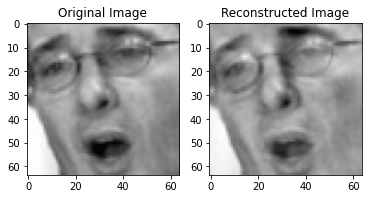

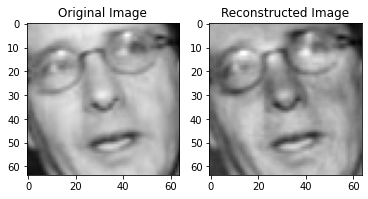

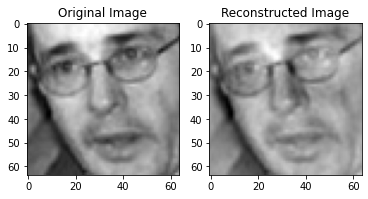

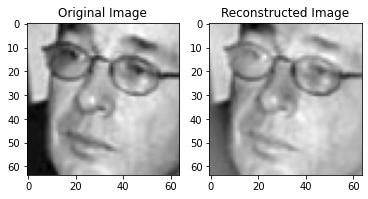

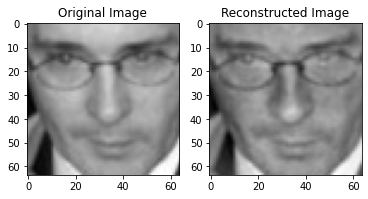

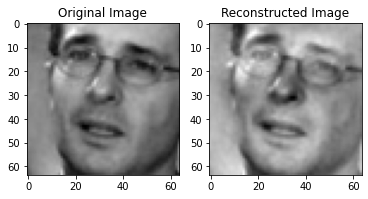

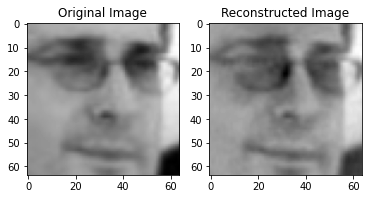

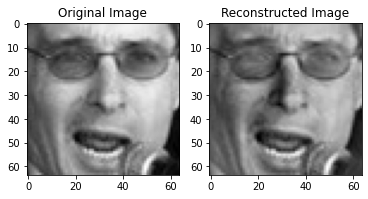

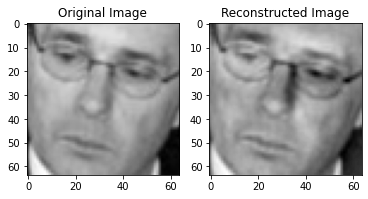

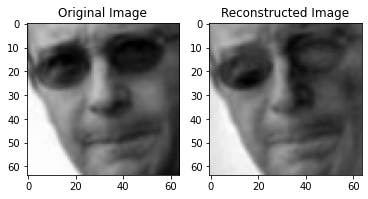

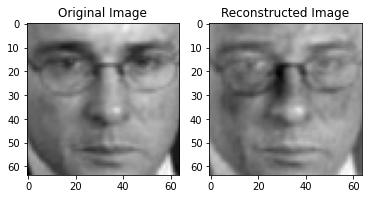

In [46]:
keys = list(trainImg.keys())
j=19
for i in range(j,j+19):
    fig ,axs = plt.subplots(1,2,figsize=(6,3))
    axs[0].set_title("Original Image")
    axs[0].imshow(trainImg[keys[j//19]][i-j],cmap='gray')
    axs[1].set_title("Reconstructed Image")
    axs[1].imshow(reconstructedtrain[i].reshape(64,64),cmap = 'gray')
    plt.show()

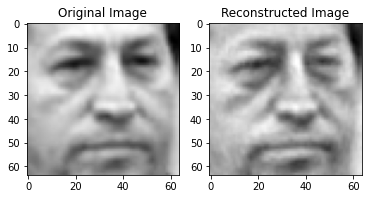

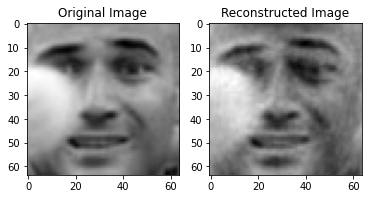

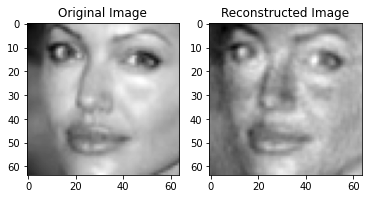

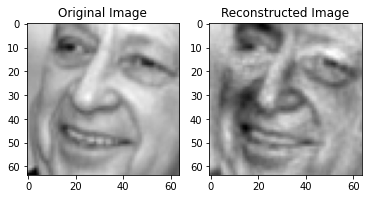

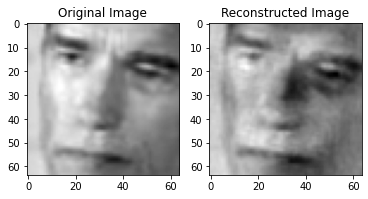

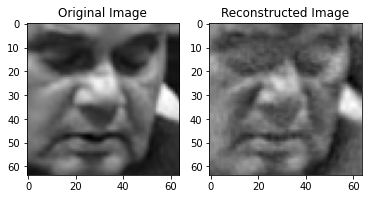

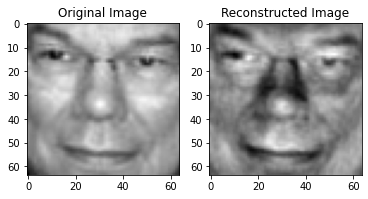

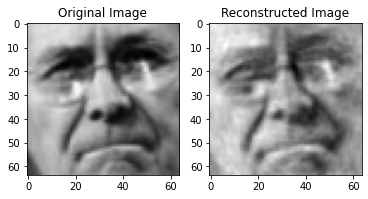

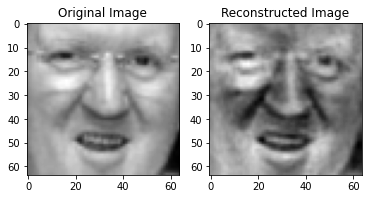

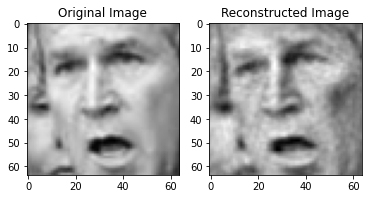

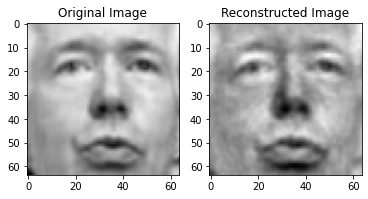

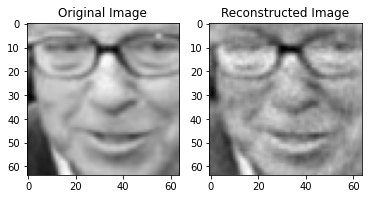

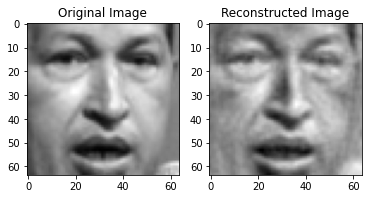

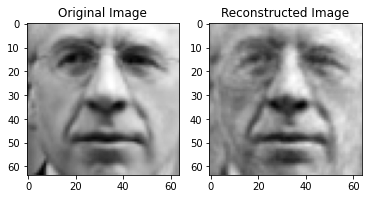

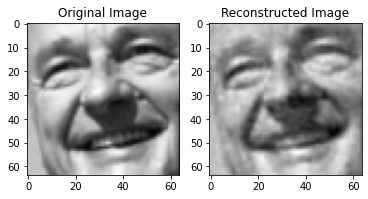

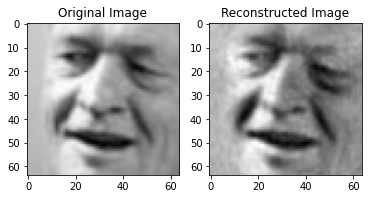

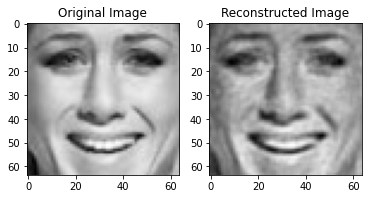

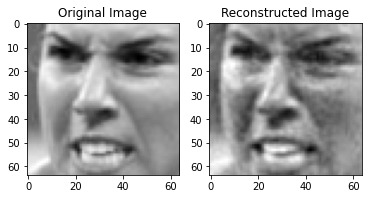

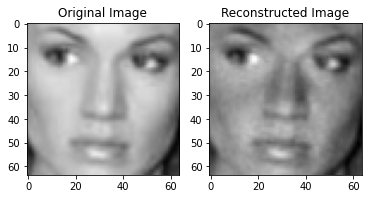

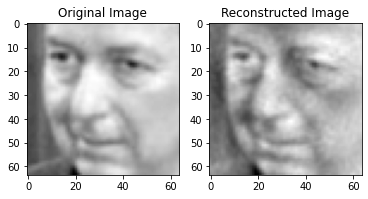

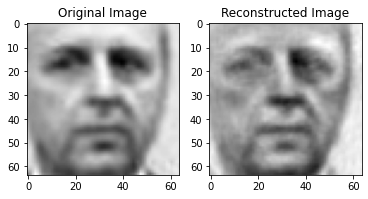

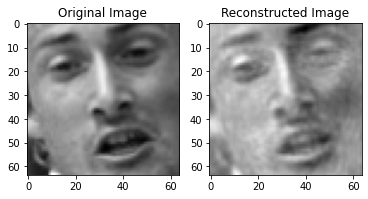

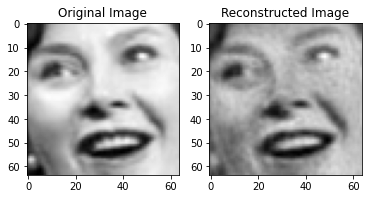

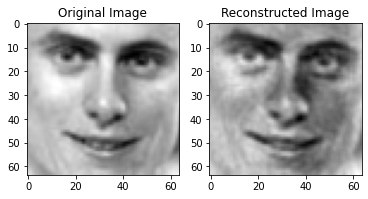

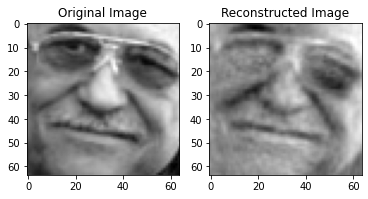

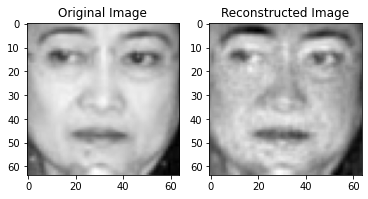

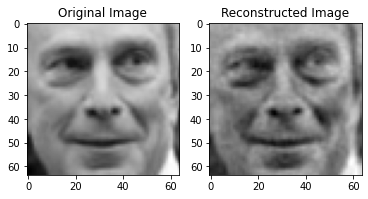

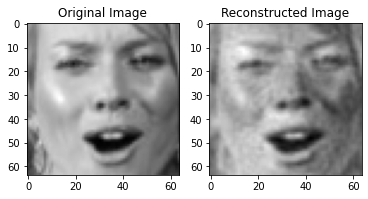

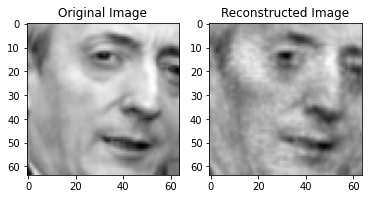

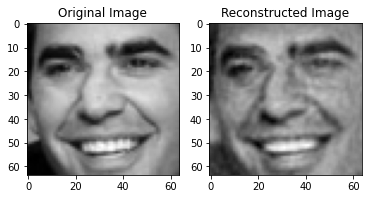

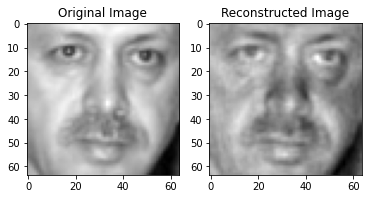

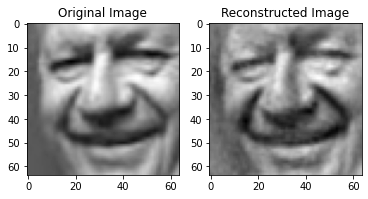

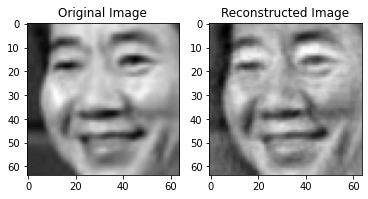

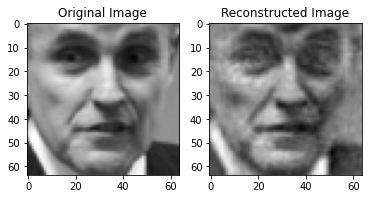

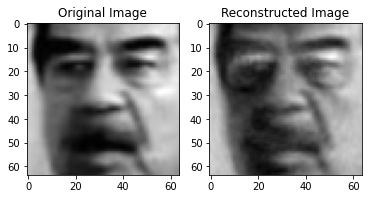

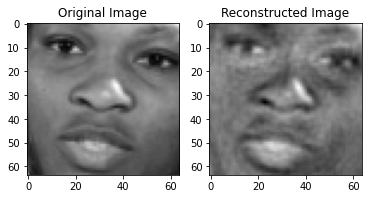

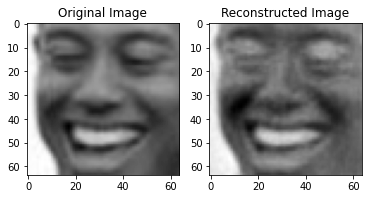

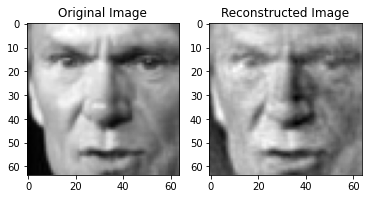

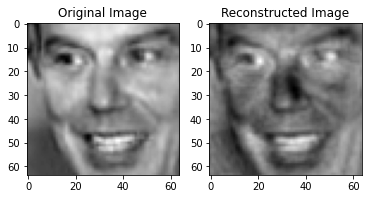

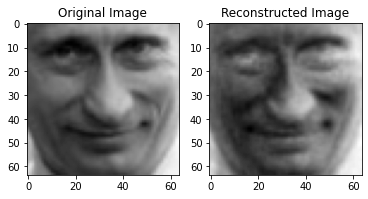

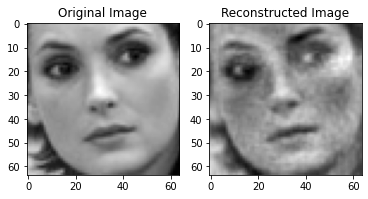

In [48]:
keys = list(testImg.keys())
for i in range(0,62):
    fig ,axs = plt.subplots(1,2,figsize=(6,3))
    axs[0].set_title("Original Image")
    axs[0].imshow(testImg[keys[i]][0],cmap='gray')
    axs[1].set_title("Reconstructed Image")
    axs[1].imshow(reconstructedtest[i].reshape(64,64),cmap = 'gray')
    plt.show()

In [98]:
A = A.T
print(A.shape)

(4096, 1178)


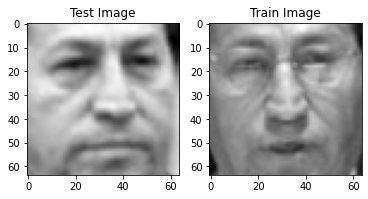

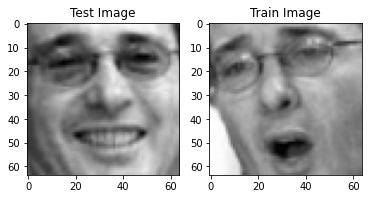

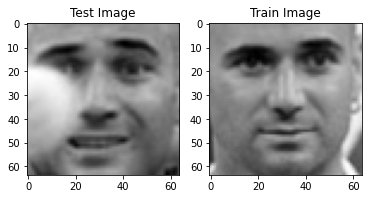

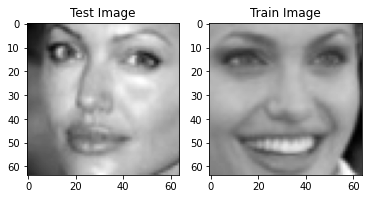

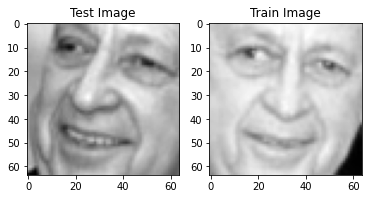

In [99]:
count = 0
for key, value in trainImg.items():
    fig ,axs = plt.subplots(1,2,figsize=(6,3))
    axs[0].set_title("Test Image")
    axs[0].imshow(testImg[key][0],cmap='gray')
    axs[1].set_title("Train Image")
    axs[1].imshow(value[0],cmap = 'gray')
    plt.show()
    count=1+count
    if(count>5):
        break    
    

In [100]:
#Covariance Matrix
Cov = np.matmul(A.T,A)

In [101]:
print(Cov.shape)

(1178, 1178)


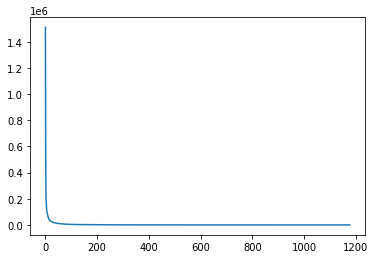

In [102]:
#Calculating Eigen Vector and Value
w , v = np.linalg.eig(Cov)

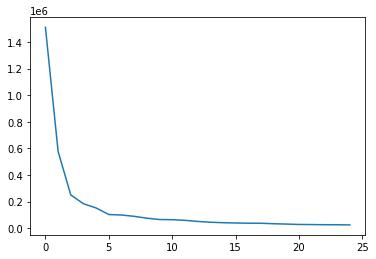

In [110]:
arr = np.arange(w.shape[0])
plt.plot(w[:25])

In [118]:
print(w[100])

4005.347517302058


In [47]:
#Sorting eVal_eganVec
eVal_eganVec = list()
for i in range(len(trainImg)*5):
    eVal_eganVec.append([w[i] , v[:,i]])
sortedeeV =sorted(eVal_eganVec, key=lambda x: x[0],reverse=True)

In [48]:
#Converting eigenvector from m x1  to n^2 x 1
eigenVector = list()
for i in sortedeeV:
    eigenVector.append(np.matmul(A,i[1]))

In [49]:
print(eigenVector[0].shape)
print(len(eigenVector))

(4096,)
310


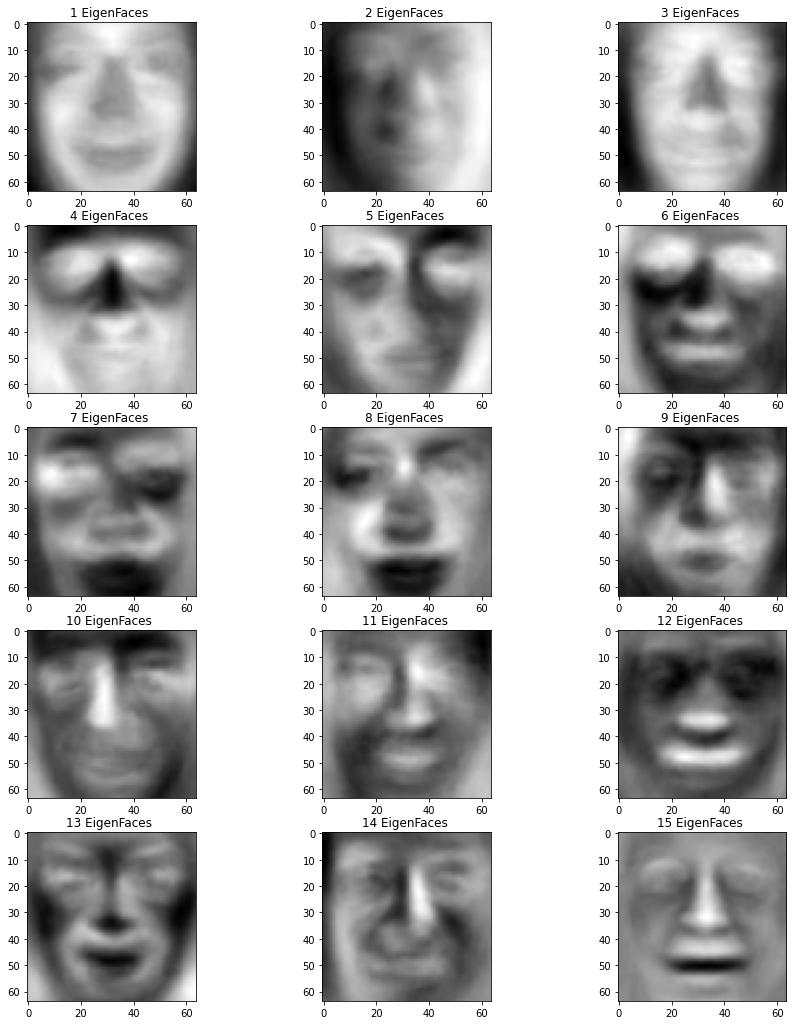

In [50]:
fig ,axs = plt.subplots(5,3,figsize=(15,18))
for i in range(5):
    for j in range(3):
        axs[i,j].set_title(str(3*i+j+1) + " EigenFaces ")
        axs[i,j].imshow(eigenVector[3*i+j].reshape(64,64),cmap = 'gray')

In [51]:
def eigenRepresentation(img,eigenVector,dim = 50):
    imgReresentation = np.zeros((dim))
    for i in range(dim):
        imgReresentation[i] = np.dot(img,eigenVector[i])
    return imgReresentation/(imgsize)

# No of eigenFaces used to make face-space
sz=len(eigenVector)

# Faces From which we learned eigenVectors
knowFaces = {}
for key, value in trainImg.items():
    knowFaces[key] = list()
    for face in value:
        meanc = face.flatten()
        meanc = (meanc - avgFace)/stdFace
        knowFaces[key].append(eigenRepresentation(meanc,eigenVector,sz))

unknowFaces = {}
for key, value in testImg.items():
    unknowFaces[key] = list()
    for face in value:
        meanc = face.flatten()
        meanc = (meanc - avgFace)/stdFace
        unknowFaces[key].append(eigenRepresentation(meanc,eigenVector,sz))

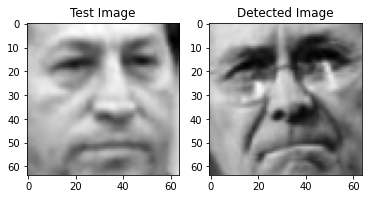

2.7694748930601993
Incorrect


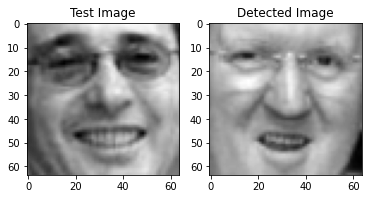

2.803517832045848
Incorrect


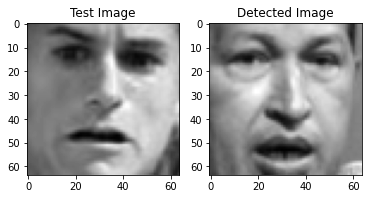

3.50251478726871
Incorrect


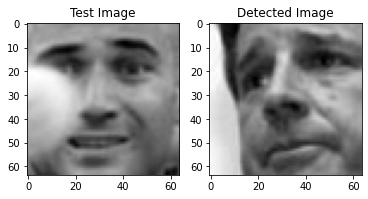

3.114946971084529
Incorrect


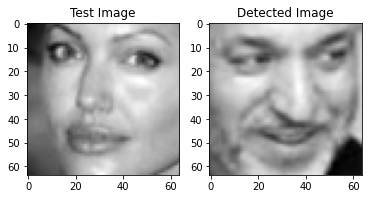

2.1433747859811283
Incorrect


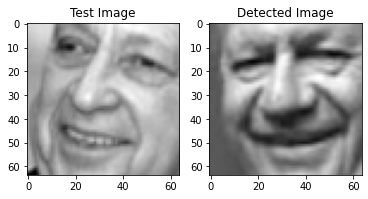

2.577711023089783
Incorrect


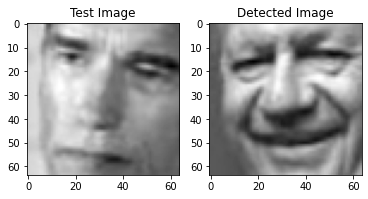

2.3724626918108345
Incorrect


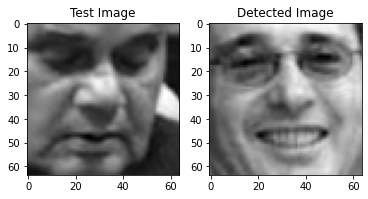

2.678210593217412
Incorrect


2.9552246349316906
Incorrect


2.392794047131625
Incorrect


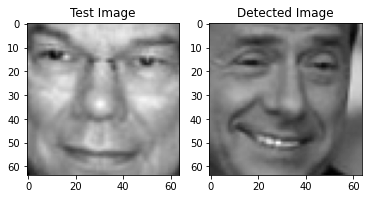

1.487060847996496
Incorrect


2.77663229657897
Incorrect


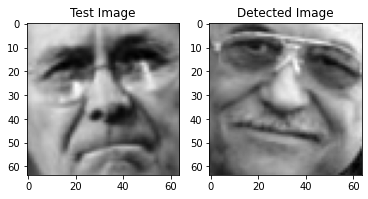

2.8530937474925224
Incorrect


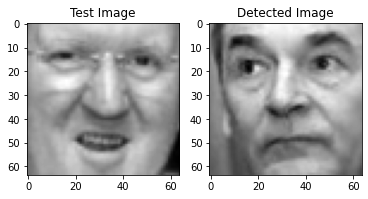

2.6146031475674154
Incorrect


2.113747967450878
Incorrect


2.6867032198110037
Incorrect


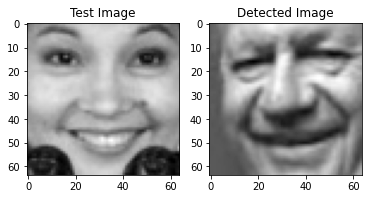

2.8616696296250725
Incorrect


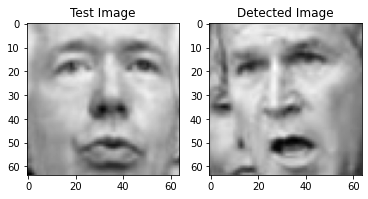

2.770653892855982
Incorrect


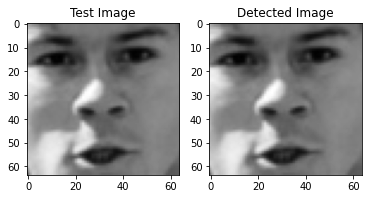

2.7672121416398805
Correct


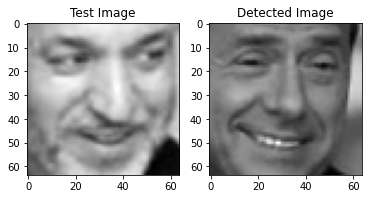

2.665894296184669
Incorrect


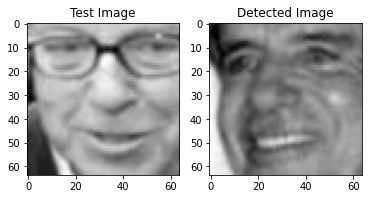

2.7286165791447337
Incorrect


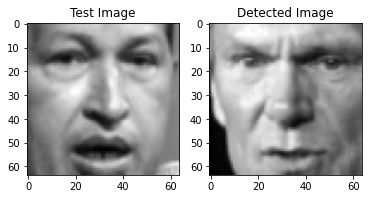

2.684201529607038
Incorrect


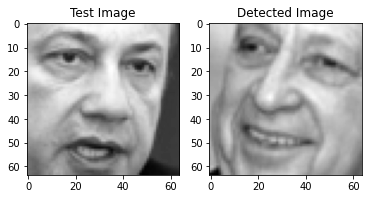

3.058548907961968
Incorrect


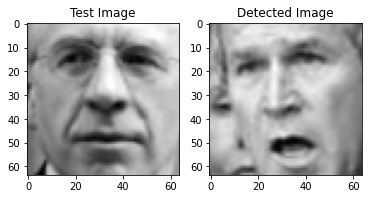

3.0301154312679213
Incorrect


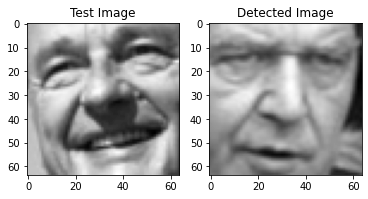

4.368803538473224
Incorrect


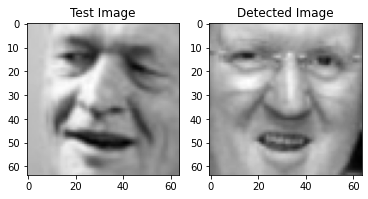

4.409588297416214
Incorrect


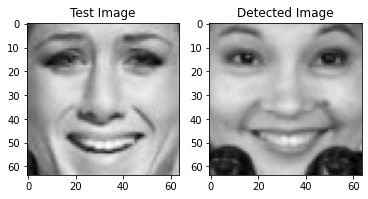

3.20333797252385
Incorrect


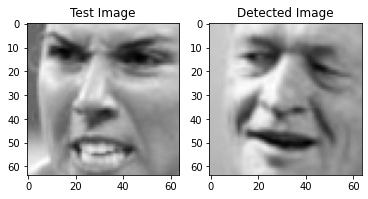

2.8261760002645406
Incorrect


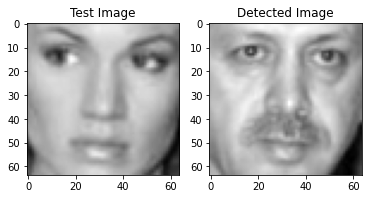

2.2840676346725033
Incorrect


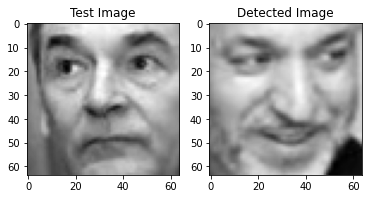

2.4920644676167876
Incorrect


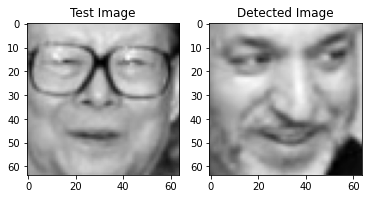

2.553968993362603
Incorrect


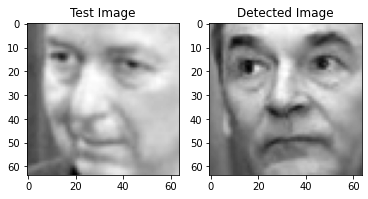

2.3824699527454922
Incorrect


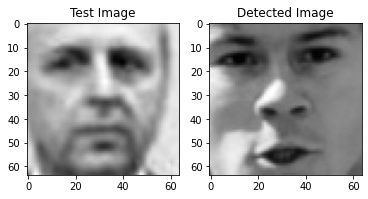

3.0166304436309206
Incorrect


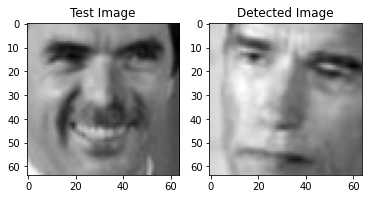

2.8711314102227594
Incorrect


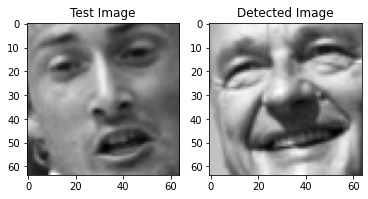

2.563090412683842
Incorrect


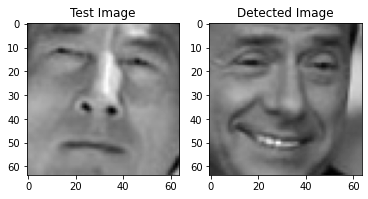

2.3774913867897634
Incorrect


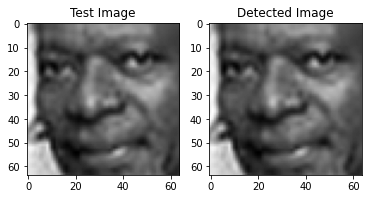

2.822756977205365
Correct


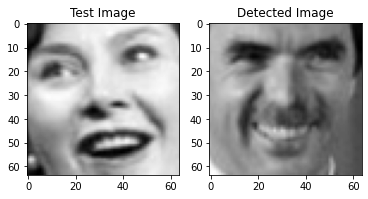

3.1591753675884986
Incorrect


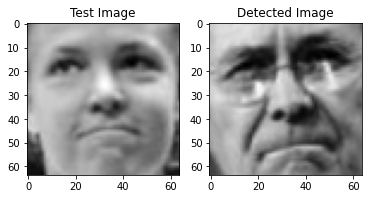

1.9352780603761905
Incorrect


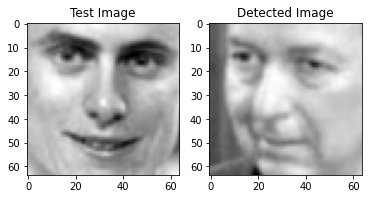

2.7095324814456645
Incorrect


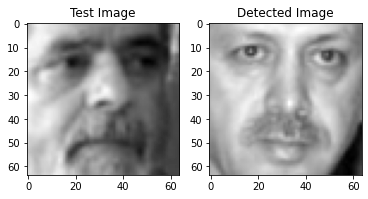

4.749895902742089
Incorrect


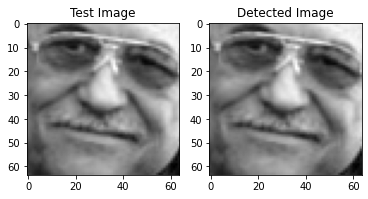

2.9783943004331714
Correct


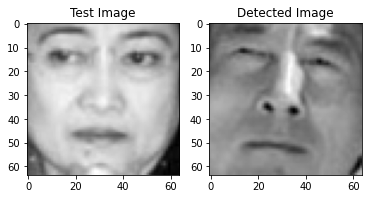

2.367799471208745
Incorrect


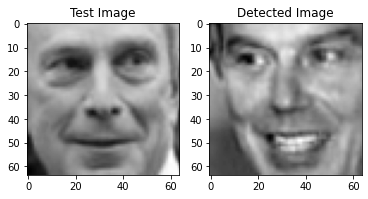

2.6406454039645886
Incorrect


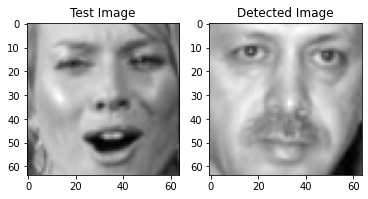

3.076739103854926
Incorrect


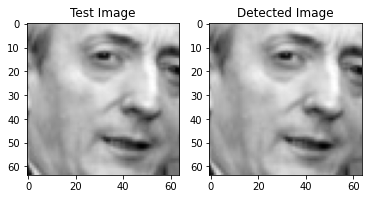

2.717528575367497
Correct


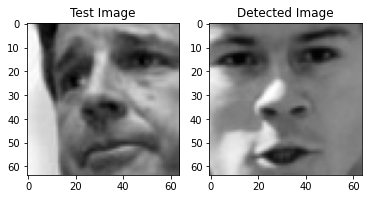

3.629827843635603
Incorrect


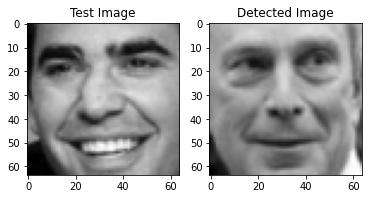

3.0061724525190514
Incorrect


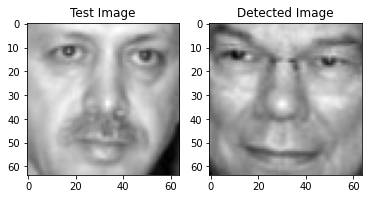

2.4150369956889457
Incorrect


2.455619622572302
Incorrect


2.777014679694767
Incorrect


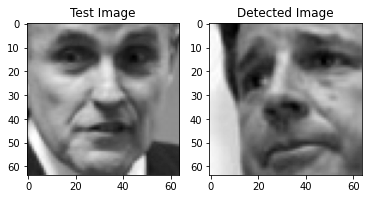

3.0042693565715397
Incorrect


6.162997438463501
Incorrect


2.522455768365262
Incorrect


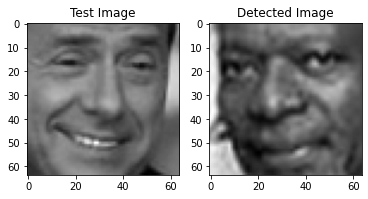

1.7732139850265407
Incorrect


2.8833846019361458
Incorrect


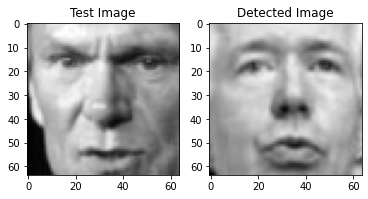

4.097210179438166
Incorrect


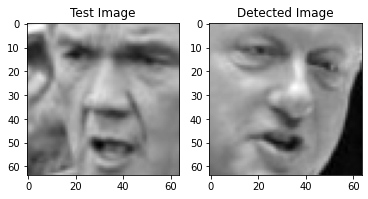

2.10264130604844
Incorrect


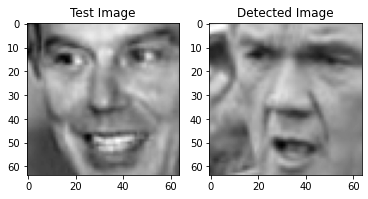

2.224303691054384
Incorrect


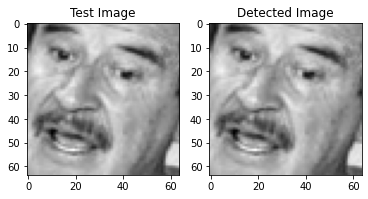

2.184770430868232
Correct


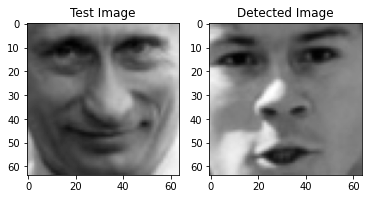

3.1811787230080983
Incorrect


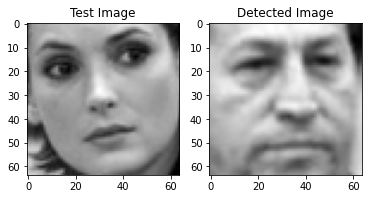

2.7502954681084844
Incorrect
Correct :  5
Incorrect :  57
Total :  62


In [56]:
# Testing Phase
correct = 0
incorrect =0
total=0
for key,value in unknowFaces.items():# A : [imga20]
    for puface in value:#pface = Projected unkown Face
        total+=1
        minDist = 1000
        ans = 'None'
        for tkey, tvalue in knowFaces.items():
            for pkface in tvalue:
                dist = np.linalg.norm(puface - pkface )#Euclidean distance
                #print(dist)
                if( dist < minDist):
                    minDist = dist
                    ans = tkey #imga18
        fig ,axs = plt.subplots(1,2,figsize=(6,3))
        axs[0].set_title("Test Image")
        axs[0].imshow(testImg[key][0],cmap='gray')
        axs[1].set_title("Detected Image")
        axs[1].imshow(testImg[ans][0],cmap = 'gray')
        plt.show()
        print(minDist)
        if(ans == key):
            correct=correct+1
            print("Correct")
            
        else:
            incorrect=incorrect+1
            print("Incorrect")
print("Correct : ",correct)
print("Incorrect : ",incorrect)
print("Total : ",correct+incorrect)


In [35]:
print("Total : ",total)

Total :  1845
